In [2]:
from env.stock_raw.backtest.utils import ParquetFile
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/data3/renyong/kafang
/data3/renyong/kafang


['20200219', '20200218', '20200217', '20200214', '20200213', '20200212', '20200211', '20200210', '20200207', '20200206', '20200205', '20200204', '20200203', '20200123', '20200122', '20200121', '20200120', '20200117', '20200116', '20200115', '20200114', '20200113', '20200110', '20200109', '20200108', '20200107', '20200106', '20200103', '20200102']


  0%|          | 0/29 [00:00<?, ?it/s]

20200219
train_data_1.parquet
1
./env/stock_raw/data_csv/202002190/1
[1.069858611006853, 0.16743622975263003, -1.124129329317969, 0.12626590701321608, 0.5314305183663575, 0.04492632794101156, 0.830301503115681, 0.19379528491909156, -0.601308373805924, -0.5215681645642863, -0.09244882516058332, -0.4336581716888186, -0.4022591247425281, -0.7203760851521289, 0.11914442739683674, 0.7704339028874269, 0.637714124307748, 0.5423343668930133, 0.06441327897486496, -1.069295669816713, -0.01688300421963685, -0.001134966625555643, -0.14325588068920744, -0.11384723613679376, -0.06094800307386648, 0.2638117198757004, -0.3789350368232985, 0.2179119715544511, -0.22182379136644284, -0.4208800132646732, -0.5678126593549251, -1.2988102303915394, -1.0530206867591196, -0.8765730566683642, -1.4449495492605295, -1.2622724569188608, -0.16818033084140319, -0.03276992262896076, 0.9565326500268859, 0.9719035730831584, 0.8657028680522957, 0.29857889879375915, -0.00804293546537336, 0.5816813750941754, 0.22278796047

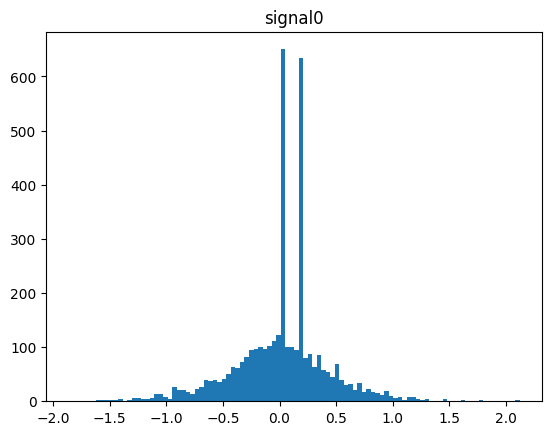

[ 1.  2.  1. ... 16.  1. 35.]
8.843996941116492
22.077174016935256
410.0
1.0
4.0


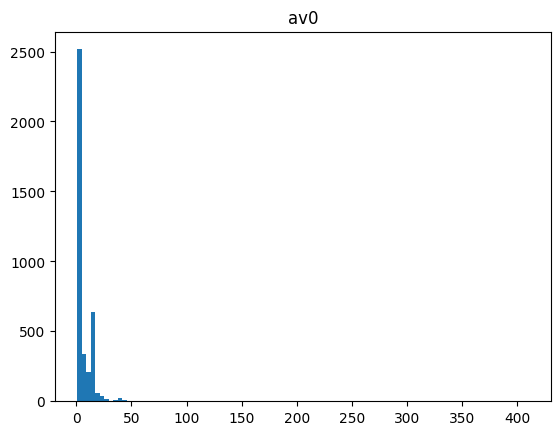

[  9.  17.   1. ...   9.  15. 375.]
9.816721896507774
29.28561098418818
516.0
1.0
4.0


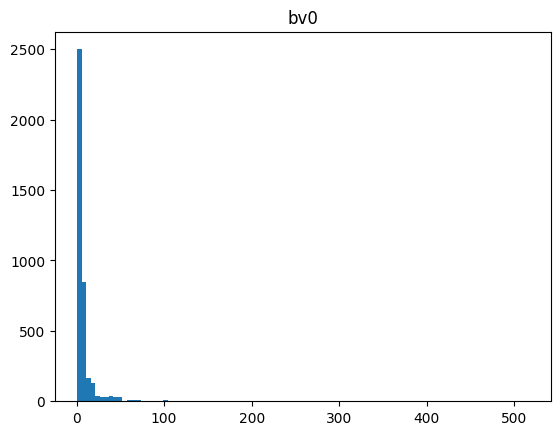

  0%|          | 0/29 [00:01<?, ?it/s]


In [6]:
stock_path = "./env/stock_raw"
signal_file_original_rootpath = os.path.join(stock_path, 'data')
dateList = [name for name in os.listdir(signal_file_original_rootpath) if
                    os.path.isdir(os.path.join(signal_file_original_rootpath, name))]
print(dateList)
os.makedirs(os.path.join(stock_path, "data_csv"), exist_ok=True)
for date in tqdm(dateList[:]):
    os.makedirs(os.path.join(stock_path, "data_csv", date), exist_ok=True)
    print(date)
    if date == '20200225' or date == '20200224' or date == '20200221' or date == '20200220':
        continue
    # all_dfs = []
    signal0 = []
    av0 = []
    bv0 = []
    for file_code in os.listdir(os.path.join(stock_path, "data", date)):
        print(file_code)
        if len(file_code.split(".")[0]) < 11:
            continue
        print(file_code.split(".")[0][11:])
        new_dir = os.path.join(stock_path, "data_csv", date+'0', file_code.split(".")[0][11:])
        print(new_dir)
        os.makedirs(new_dir, exist_ok=True)
        if file_code.endswith(".parquet"):
            file_path = os.path.join(stock_path, "data", date, file_code)
            df = pd.read_parquet(file_path)
            for i in range(len(df)):
                signal0.append(df.iloc[i]["signal0"])
                av0.append(df.iloc[i]["askVlm1"])
                bv0.append(df.iloc[i]["bidVlm1"])
            # write to csv
            # df.to_csv(os.path.join(stock_path, "data_csv", date+'0', file_code.split(".")[0][11:], file_code.replace('.parquet', '.csv')), index=False)
            # print(df)
        break
    print(signal0)
    # plot histogram
    signal0 = np.array(signal0)
    print(signal0)
    print(np.mean(signal0))
    print(np.std(signal0))
    print(np.max(signal0))
    print(np.min(signal0))
    print(np.median(signal0))
    plt.hist(signal0, bins=100)
    plt.title('signal0')
    plt.show()
    # plot histogram
    av0 = np.array(av0)
    print(av0)
    print(np.mean(av0))
    print(np.std(av0))
    print(np.max(av0))
    print(np.min(av0))
    print(np.median(av0))
    plt.hist(av0, bins=100)
    plt.title('av0')
    plt.show()
    # plot histogram
    bv0 = np.array(bv0)
    print(bv0)
    print(np.mean(bv0))
    print(np.std(bv0))
    print(np.max(bv0))
    print(np.min(bv0))
    print(np.median(bv0))
    plt.hist(bv0, bins=100)
    plt.title('bv0')
    plt.show()
    
    break